In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split

2024-10-23 00:30:56.904649: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-23 00:30:57.758188: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


IPPR CNN Model 

Import image data from dataset containing 20000 positive images and 20000 negative images with each image being 227 x 227 pixels large. Kaggle link: https://www.kaggle.com/datasets/arnavr10880/concrete-crack-images-for-classification/data

In [4]:
data = tf.keras.utils.image_dataset_from_directory('Data', image_size=(227, 227), batch_size=32)

Found 40000 files belonging to 2 classes.


Shuffle the dataset before splitting the data into training, testing and validation sets.

In [5]:
shuffled_data = data.shuffle(buffer_size=100, reshuffle_each_iteration=False)

Splitting the dataset into training, testining and validation sets.

In [6]:
training_split_size = int(len(data)*.7)
testing_split_size = int(len(data)*.15)
validation_split_size = int(len(data)*.15)

In [7]:
training_set = shuffled_data.take(training_split_size)
testing_set = shuffled_data.skip(training_split_size).take(testing_split_size)
validation_set = shuffled_data.skip(training_split_size+testing_split_size).take(validation_split_size)

Model Building

In [8]:
model = Sequential()

model.add(tf.keras.Input(shape=(227,227,3)))
model.add(Conv2D(32, 9, strides = 2, activation = 'relu')) 
model.add(Conv2D(16, 7, strides = 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, 3, strides = 1, activation = 'relu')) 
model.add(Conv2D(16, 3, strides = 1, activation = 'relu')) 
model.add(MaxPooling2D())

model.add(tf.keras.layers.GlobalMaxPooling2D())

model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))




Compiling Model

In [9]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 32)      7808      
                                                                 
 conv2d_1 (Conv2D)           (None, 104, 104, 16)      25104     
                                                                 
 max_pooling2d (MaxPooling2  (None, 52, 52, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 16)        2320      
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                   

In [11]:
hist = model.fit(training_set, epochs = 20, validation_data = validation_set)

Epoch 1/20


2024-10-23 00:31:55.099900: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-10-23 00:31:58.140951: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-23 00:31:58.376253: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f179c00f950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-23 00:31:58.376290: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-10-23 00:31:58.404251: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-23 00:31:58.605005: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

875/875 [==============================] - 39s 36ms/step - loss: 0.1068 - accuracy: 0.9670 - val_loss: 0.0721 - val_accuracy: 0.9754
Epoch 2/20
875/875 [==============================] - 32s 36ms/step - loss: 0.0704 - accuracy: 0.9746 - val_loss: 0.0501 - val_accuracy: 0.9809
Epoch 3/20
875/875 [==============================] - 32s 36ms/step - loss: 0.0545 - accuracy: 0.9808 - val_loss: 0.0406 - val_accuracy: 0.9885
Epoch 4/20
875/875 [==============================] - 32s 36ms/step - loss: 0.0472 - accuracy: 0.9838 - val_loss: 0.0431 - val_accuracy: 0.9880
Epoch 5/20
875/875 [==============================] - 32s 36ms/step - loss: 0.0416 - accuracy: 0.9865 - val_loss: 0.0353 - val_accuracy: 0.9866
Epoch 6/20
875/875 [==============================] - 31s 35ms/step - loss: 0.0418 - accuracy: 0.9871 - val_loss: 0.0283 - val_accuracy: 0.9916
Epoch 7/20
875/875 [==============================] - 32s 36ms/step - loss: 0.0505 - accuracy: 0.9846 - val_loss: 0.0336 - val_accuracy: 0.9885
Epo

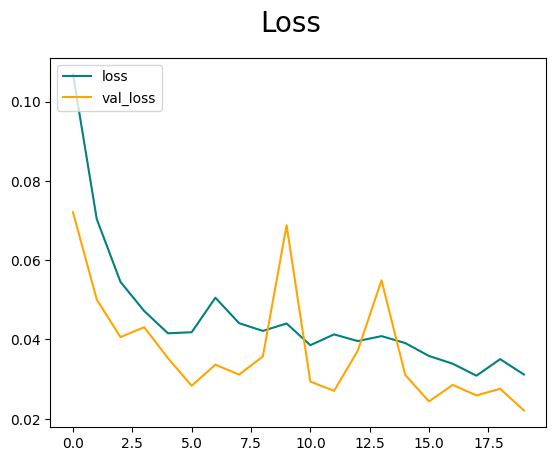

In [12]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

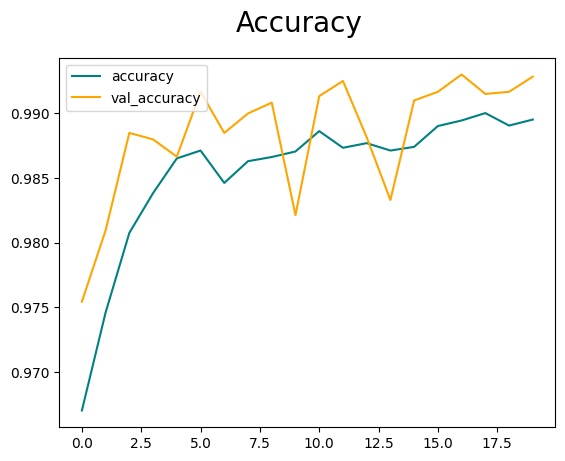

In [13]:
fig2 = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig2.suptitle("Accuracy", fontsize = 20)
plt.legend(loc="upper left")
plt.show()